In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
df=pd.read_csv('/content/gdrive/Shared drives/머신러닝1조/Train_data.csv')

# **Data Preprocessing**

In [ ]:
df

,Unnamed: 0,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,ag_004,ag_005,ag_006,ag_007,ag_008,ag_009,ah_000,ai_000,aj_000,ak_000,al_000,am_0,an_000,ao_000,ap_000,aq_000,ar_000,as_000,at_000,au_000,av_000,ax_000,ay_000,ay_001,ay_002,ay_003,ay_004,ay_005,...,db_000,dc_000,dd_000,de_000,df_000,dg_000,dh_000,di_000,dj_000,dk_000,dl_000,dm_000,dn_000,do_000,dp_000,dq_000,dr_000,ds_000,dt_000,du_000,dv_000,dx_000,dy_000,dz_000,ea_000,eb_000,ec_00,ed_000,ee_000,ee_001,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,52803,neg,41386,na,508,488,0,0,0,0,0,0,51396,886464,1445974,463524,37460,288,1201476,0,0,0,938,2076,2413426,1964298,569356,403878,0,0,0,0,1350,306,0,0,0,0,0,70932,...,14,2477720,1952,294,0,0,0,0,0,0,0,0,21400,17586,9298,0,0,47950,10374,11654140,1192190,0,0,0,0,12104700,892.06,932,440284,566428,438088,202172,383094,392838,228526,104226,122526,6924,0,0
1,38189,neg,29616,na,1616,1490,0,0,0,0,0,0,452,42620,1139952,594268,42722,1356,782906,0,0,0,0,0,1648400,1444266,279682,166476,0,0,0,0,1870,438,0,0,0,0,0,140594,...,38,1571926,1292,42,0,0,0,0,0,0,0,0,11100,13888,3620,0,0,50184,8710,10180,2956,1863908,4956,0,0,28608110,826.88,822,272206,251774,145524,72858,171332,308328,379466,213826,5764,292,0,0
2,23291,neg,241352,na,na,na,na,na,0,0,0,10140,639334,9259336,7148984,676812,10432,114,6517102,0,134,na,16102,35412,14619728,12828512,3822378,1703358,na,0,0,0,na,na,0,0,0,0,0,3857616,...,na,na,na,na,na,na,na,na,na,na,na,na,127046,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,1263218,4943892,3617298,2477772,3631902,997462,436380,202002,173850,1376,na,na
3,16862,neg,8100,na,86,76,0,0,0,0,0,0,112,66898,400152,66542,4032,0,265216,0,132,0,0,0,488114,427978,95602,44644,0,0,0,0,128,34,0,0,0,0,0,4188,...,0,465634,358,72,0,0,0,0,0,0,0,0,4744,5490,1338,0,0,13182,3426,9440,2182,0,0,0,0,7089930,283.78,290,81694,82456,66980,36658,91898,86634,60276,23616,7518,2,0,0
4,14055,neg,2290,na,636,448,0,0,0,0,0,0,354,27320,77152,31582,0,0,61964,0,0,0,0,0,128728,117464,15320,8464,0,0,0,0,102,450,0,0,0,0,0,4512,...,50,126262,124,38,0,0,0,0,0,0,0,0,762,324,120,0,0,3392,690,380,38,0,0,0,0,1290160,81.34,96,12490,17962,11542,7394,14206,69592,3108,108,6,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56995,43966,neg,1476,na,134,108,0,0,0,0,0,0,238,48942,76828,1550,0,0,56710,0,308,1196,0,0,125998,106300,49970,10366,0,0,0,0,174,80,0,0,0,0,0,2776,...,40,100682,248,62,0,0,0,0,0,0,0,0,1264,590,162,0,0,3742,704,23360,4826,30442,92,0,0,301890,392.32,240,33786,23114,8304,7138,53280,1590,210,38,98,0,0,0
56996,4128,neg,2,na,48,24,0,0,0,0,0,0,178,206,3810,0,0,0,1294,0,0,0,0,0,2460,822,17046,788,0,0,0,0,14,6,0,0,0,0,0,0,...,0,1832,34,32,0,0,0,0,0,0,0,0,102,0,0,332,42,38,14,980,116,24078,36,0,0,0,na,na,2672,1276,160,24,40,14,8,0,0,0,0,0
56997,34715,pos,665870,2,304,na,0,0,0,0,0,39582,1117230,3137410,1317998,288822,76612,766,19464540,6640,0,0,2429062,3379870,36585350,33067452,10590072,5414320,0,0,2886,0,156,6,0,0,0,0,0,0,...,na,na,15572,426,174110,450858,0,0,0,0,0,0,385196,34658,9164,0,0,152594,25398,8518640,947756,0,0,0,0,6179960,3505.86,3310,1222938,600670,407794,168822,452818,801402,1029832,1265422,28722,0,0,0
56998,56900,neg,40440,na,94,64,0,0,0,0,0,0,158,141128,1785444,571794,37980,926,1253630,0,148,0,0,0,2332264,2116830,316412,168528,0,0,0,0,110,44,0,0,0,0,0,234576,...,0,2242534,1402,152,0,0,0,0,0,0,0,0,14810,33654,6892,0,0,84296,12986,5520,2902,0,0,0,0,736820,955.94,966,342954,375780,339622,179816,373162,276578,241092,162912,235174,10340,0,0


## Delete an 'Unnamed' column  and get dummies for class column

In [ ]:
df=pd.get_dummies(df, columns=["class"])
df=df.drop(['class_neg'],axis=1)
df.rename(columns = {"class_pos": "class"}, inplace=True)
df=df.drop(['Unnamed: 0'],axis=1)
df

,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,ag_004,ag_005,ag_006,ag_007,ag_008,ag_009,ah_000,ai_000,aj_000,ak_000,al_000,am_0,an_000,ao_000,ap_000,aq_000,ar_000,as_000,at_000,au_000,av_000,ax_000,ay_000,ay_001,ay_002,ay_003,ay_004,ay_005,ay_006,ay_007,...,dc_000,dd_000,de_000,df_000,dg_000,dh_000,di_000,dj_000,dk_000,dl_000,dm_000,dn_000,do_000,dp_000,dq_000,dr_000,ds_000,dt_000,du_000,dv_000,dx_000,dy_000,dz_000,ea_000,eb_000,ec_00,ed_000,ee_000,ee_001,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000,class
0,41386,na,508,488,0,0,0,0,0,0,51396,886464,1445974,463524,37460,288,1201476,0,0,0,938,2076,2413426,1964298,569356,403878,0,0,0,0,1350,306,0,0,0,0,0,70932,891012,1344136,...,2477720,1952,294,0,0,0,0,0,0,0,0,21400,17586,9298,0,0,47950,10374,11654140,1192190,0,0,0,0,12104700,892.06,932,440284,566428,438088,202172,383094,392838,228526,104226,122526,6924,0,0,0
1,29616,na,1616,1490,0,0,0,0,0,0,452,42620,1139952,594268,42722,1356,782906,0,0,0,0,0,1648400,1444266,279682,166476,0,0,0,0,1870,438,0,0,0,0,0,140594,1144474,428318,...,1571926,1292,42,0,0,0,0,0,0,0,0,11100,13888,3620,0,0,50184,8710,10180,2956,1863908,4956,0,0,28608110,826.88,822,272206,251774,145524,72858,171332,308328,379466,213826,5764,292,0,0,0
2,241352,na,na,na,na,na,0,0,0,10140,639334,9259336,7148984,676812,10432,114,6517102,0,134,na,16102,35412,14619728,12828512,3822378,1703358,na,0,0,0,na,na,0,0,0,0,0,3857616,10688950,1628654,...,na,na,na,na,na,na,na,na,na,na,na,127046,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,1263218,4943892,3617298,2477772,3631902,997462,436380,202002,173850,1376,na,na,0
3,8100,na,86,76,0,0,0,0,0,0,112,66898,400152,66542,4032,0,265216,0,132,0,0,0,488114,427978,95602,44644,0,0,0,0,128,34,0,0,0,0,0,4188,269050,156142,...,465634,358,72,0,0,0,0,0,0,0,0,4744,5490,1338,0,0,13182,3426,9440,2182,0,0,0,0,7089930,283.78,290,81694,82456,66980,36658,91898,86634,60276,23616,7518,2,0,0,0
4,2290,na,636,448,0,0,0,0,0,0,354,27320,77152,31582,0,0,61964,0,0,0,0,0,128728,117464,15320,8464,0,0,0,0,102,450,0,0,0,0,0,4512,102046,12734,...,126262,124,38,0,0,0,0,0,0,0,0,762,324,120,0,0,3392,690,380,38,0,0,0,0,1290160,81.34,96,12490,17962,11542,7394,14206,69592,3108,108,6,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56995,1476,na,134,108,0,0,0,0,0,0,238,48942,76828,1550,0,0,56710,0,308,1196,0,0,125998,106300,49970,10366,0,0,0,0,174,80,0,0,0,0,0,2776,124782,0,...,100682,248,62,0,0,0,0,0,0,0,0,1264,590,162,0,0,3742,704,23360,4826,30442,92,0,0,301890,392.32,240,33786,23114,8304,7138,53280,1590,210,38,98,0,0,0,0
56996,2,na,48,24,0,0,0,0,0,0,178,206,3810,0,0,0,1294,0,0,0,0,0,2460,822,17046,788,0,0,0,0,14,6,0,0,0,0,0,0,0,0,...,1832,34,32,0,0,0,0,0,0,0,0,102,0,0,332,42,38,14,980,116,24078,36,0,0,0,na,na,2672,1276,160,24,40,14,8,0,0,0,0,0,0
56997,665870,2,304,na,0,0,0,0,0,39582,1117230,3137410,1317998,288822,76612,766,19464540,6640,0,0,2429062,3379870,36585350,33067452,10590072,5414320,0,0,2886,0,156,6,0,0,0,0,0,0,0,3381264,...,na,15572,426,174110,450858,0,0,0,0,0,0,385196,34658,9164,0,0,152594,25398,8518640,947756,0,0,0,0,6179960,3505.86,3310,1222938,600670,407794,168822,452818,801402,1029832,1265422,28722,0,0,0,1
56998,40440,na,94,64,0,0,0,0,0,0,158,141128,1785444,571794,37980,926,1253630,0,148,0,0,0,2332264,2116830,316412,168528,0,0,0,0,110,44,0,0,0,0,0,234576,1717442,447164,...,2242534,1402,152,0,0,0,0,0,0,0,0,14810,33654,6892,0,0,84296,12986,5520,2902,0,0,0,0,736820,955.94,966,342954,375780,339622,179816,373162,276578,241092,162912,235174,10340,0,0,0


## Check column's data types and Convert string 'na' to np.nan

In [ ]:
df.dtypes

aa_000     int64
ab_000    object
ac_000    object
ad_000    object
ae_000    object
           ...  
ee_008    object
ee_009    object
ef_000    object
eg_000    object
class      uint8
Length: 171, dtype: object

int나 float이 아닌 object로 나오는 걸로 봐서, na가 문자열로 들어가 있음을 알 수 있다.

In [ ]:
for i in range(len(df.columns)):
    df.iloc[:,i]=df.iloc[:,i].apply(lambda x : np.nan if x=='na' else x)
    df.iloc[:,i]=pd.to_numeric(df.iloc[:,i])

In [ ]:
df.dtypes

aa_000      int64
ab_000    float64
ac_000    float64
ad_000    float64
ae_000    float64
           ...   
ee_008    float64
ee_009    float64
ef_000    float64
eg_000    float64
class       int64
Length: 171, dtype: object

## Check the ratio of missing value of each columns and Drop the columns whose ratios of missing value are greater than 50%.


In [ ]:
df.isnull().sum()

aa_000        0
ab_000    43988
ac_000     3237
ad_000    14178
ae_000     2420
          ...  
ee_008      644
ee_009      644
ef_000     2645
eg_000     2644
class         0
Length: 171, dtype: int64

In [ ]:
missing_df=df.isnull().sum().reset_index()
missing_df.columns=['column', 'count']
missing_df['ratio']=missing_df['count']/df.shape[0]
missing_df=missing_df[missing_df.ratio!=0]
missing_df=missing_df.sort_values(by='ratio', ascending=False)
missing_df

,column,count,ratio
38,br_000,46774,0.820596
37,bq_000,46239,0.811211
36,bp_000,45290,0.794561
1,ab_000,43988,0.771719
62,cr_000,43988,0.771719
...,...,...,...
44,by_000,431,0.007561
54,ci_000,317,0.005561
55,cj_000,317,0.005561
56,ck_000,317,0.005561


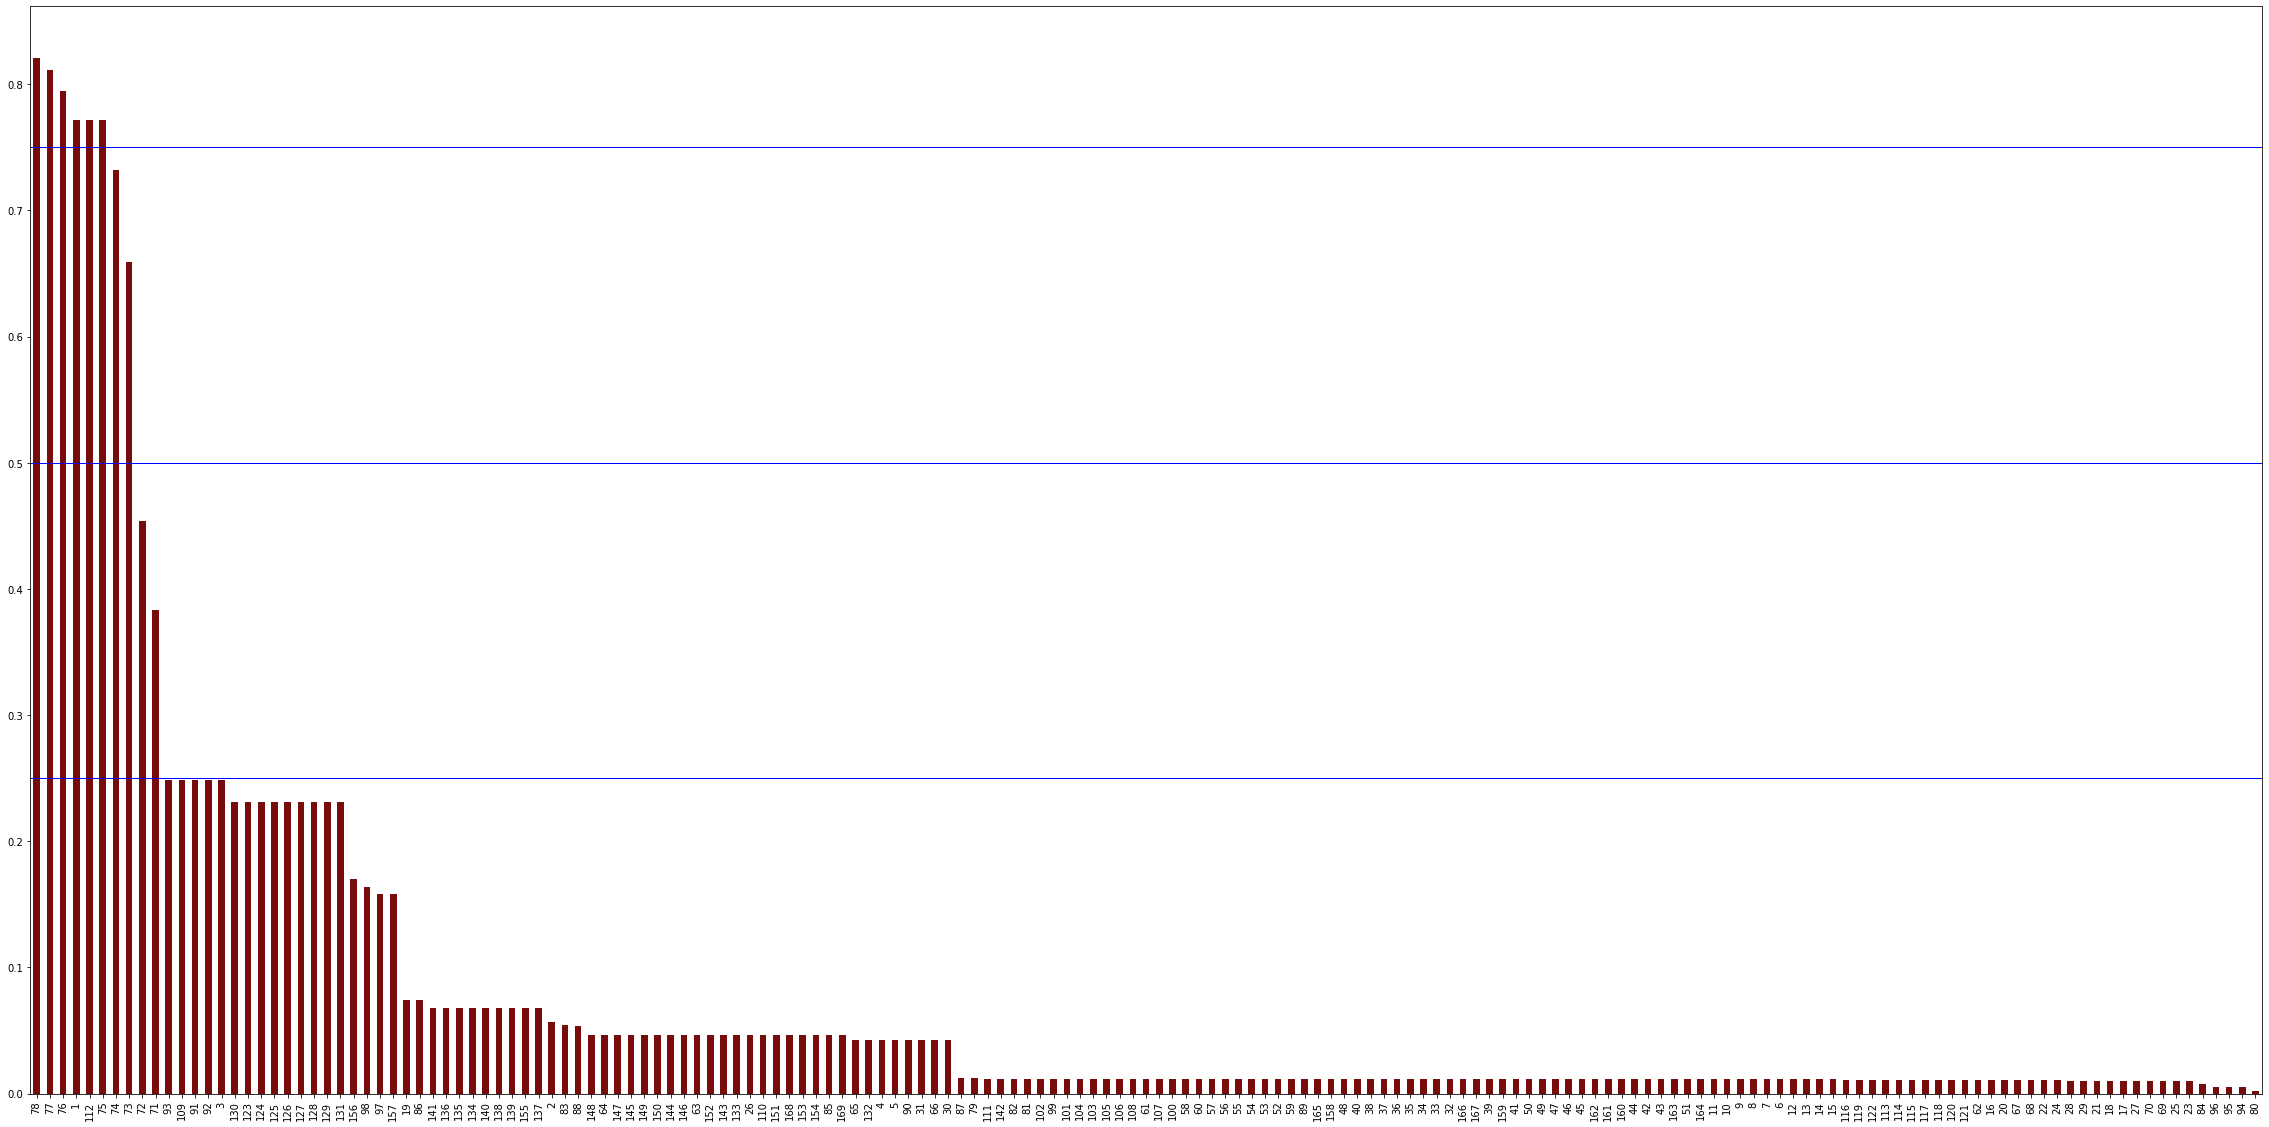

In [ ]:
plt.figure(figsize=(40,20))
missing_df.ratio.plot.bar(color='#760C0C')
plt.axhline(y=0.75, color='b', linewidth=1)
plt.axhline(y=0.5, color='b', linewidth=1)
plt.axhline(y=0.25, color='b', linewidth=1)
plt.show()

In [ ]:
missing_df[missing_df.ratio>0.5]

,column,count,ratio
78,br_000,46774,0.820596
77,bq_000,46239,0.811211
76,bp_000,45290,0.794561
1,ab_000,43988,0.771719
112,cr_000,43988,0.771719
75,bo_000,43982,0.771614
74,bn_000,41737,0.732228
73,bm_000,37554,0.658842


총 8개의 columns이 결측치 비율이 50%이상임을 알 수 있다.

*   항목 추가
*   항목 추가



In [ ]:
missing_df[missing_df.ratio<0.1]

,column,count,ratio
9,ak_000,4251,0.074579
46,ca_000,4213,0.073912
81,dm_000,3878,0.068035
74,df_000,3877,0.068018
75,dg_000,3877,0.068018
...,...,...,...
44,by_000,431,0.007561
54,ci_000,317,0.005561
55,cj_000,317,0.005561
56,ck_000,317,0.005561


171개의 columns중 141개 즉, 약 82.4%의 column들의 결측치가 10%이하임을 알 수 있다.

In [ ]:
df=df.drop(list(missing_df[missing_df.ratio>0.5].column),axis=1)
df

,aa_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,ag_004,ag_005,ag_006,ag_007,ag_008,ag_009,ah_000,ai_000,aj_000,ak_000,al_000,am_0,an_000,ao_000,ap_000,aq_000,ar_000,as_000,at_000,au_000,av_000,ax_000,ay_000,ay_001,ay_002,ay_003,ay_004,ay_005,ay_006,ay_007,ay_008,...,dc_000,dd_000,de_000,df_000,dg_000,dh_000,di_000,dj_000,dk_000,dl_000,dm_000,dn_000,do_000,dp_000,dq_000,dr_000,ds_000,dt_000,du_000,dv_000,dx_000,dy_000,dz_000,ea_000,eb_000,ec_00,ed_000,ee_000,ee_001,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000,class
0,41386,5.080000e+02,488.0,0.0,0.0,0.0,0.0,0.0,0.0,51396.0,886464.0,1445974.0,463524.0,37460.0,288.0,1201476.0,0.0,0.0,0.0,938.0,2076.0,2413426.0,1964298.0,569356.0,403878.0,0.0,0.0,0.0,0.0,1350.0,306.0,0.0,0.0,0.0,0.0,0.0,70932.0,891012.0,1344136.0,579026.0,...,2477720.0,1952.0,294.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21400.0,17586.0,9298.0,0.0,0.0,47950.0,10374.0,11654140.0,1192190.0,0.0,0.0,0.0,0.0,12104700.0,892.06,932.0,440284.0,566428.0,438088.0,202172.0,383094.0,392838.0,228526.0,104226.0,122526.0,6924.0,0.0,0.0,0
1,29616,1.616000e+03,1490.0,0.0,0.0,0.0,0.0,0.0,0.0,452.0,42620.0,1139952.0,594268.0,42722.0,1356.0,782906.0,0.0,0.0,0.0,0.0,0.0,1648400.0,1444266.0,279682.0,166476.0,0.0,0.0,0.0,0.0,1870.0,438.0,0.0,0.0,0.0,0.0,0.0,140594.0,1144474.0,428318.0,107984.0,...,1571926.0,1292.0,42.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11100.0,13888.0,3620.0,0.0,0.0,50184.0,8710.0,10180.0,2956.0,1863908.0,4956.0,0.0,0.0,28608110.0,826.88,822.0,272206.0,251774.0,145524.0,72858.0,171332.0,308328.0,379466.0,213826.0,5764.0,292.0,0.0,0.0,0
2,241352,NaN,NaN,NaN,NaN,0.0,0.0,0.0,10140.0,639334.0,9259336.0,7148984.0,676812.0,10432.0,114.0,6517102.0,0.0,134.0,NaN,16102.0,35412.0,14619728.0,12828512.0,3822378.0,1703358.0,NaN,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,3857616.0,10688950.0,1628654.0,1569932.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,127046.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1263218.0,4943892.0,3617298.0,2477772.0,3631902.0,997462.0,436380.0,202002.0,173850.0,1376.0,NaN,NaN,0
3,8100,8.600000e+01,76.0,0.0,0.0,0.0,0.0,0.0,0.0,112.0,66898.0,400152.0,66542.0,4032.0,0.0,265216.0,0.0,132.0,0.0,0.0,0.0,488114.0,427978.0,95602.0,44644.0,0.0,0.0,0.0,0.0,128.0,34.0,0.0,0.0,0.0,0.0,0.0,4188.0,269050.0,156142.0,108352.0,...,465634.0,358.0,72.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4744.0,5490.0,1338.0,0.0,0.0,13182.0,3426.0,9440.0,2182.0,0.0,0.0,0.0,0.0,7089930.0,283.78,290.0,81694.0,82456.0,66980.0,36658.0,91898.0,86634.0,60276.0,23616.0,7518.0,2.0,0.0,0.0,0
4,2290,6.360000e+02,448.0,0.0,0.0,0.0,0.0,0.0,0.0,354.0,27320.0,77152.0,31582.0,0.0,0.0,61964.0,0.0,0.0,0.0,0.0,0.0,128728.0,117464.0,15320.0,8464.0,0.0,0.0,0.0,0.0,102.0,450.0,0.0,0.0,0.0,0.0,0.0,4512.0,102046.0,12734.0,17116.0,...,126262.0,124.0,38.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,762.0,324.0,120.0,0.0,0.0,3392.0,690.0,380.0,38.0,0.0,0.0,0.0,0.0,1290160.0,81.34,96.0,12490.0,17962.0,11542.0,7394.0,14206.0,69592.0,3108.0,108.0,6.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56995,1476,1.340000e+02,108.0,0.0,0.0,0.0,0.0,0.0,0.0,238.0,48942.0,76828.0,1550.0,0.0,0.0,56710.0,0.0,308.0,1196.0,0.0,0.0,125998.0,106300.0,49970.0,10366.0,0.0,0.0,0.0,0.0,174.0,80.0,0.0,0.0,0.0,0.0,0.0,2776.0,124782.0,0.0,0.0,...,100682.0,248.0,62.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1264.0,590.0,162.0,0.0,0.0,3742.0,704.0,23360.0,4826.0,30442.0,92.0,0.0,0.0,301890.0,392.32,240.0,33786.0,23114.0,8304.0,7138.0,53280.0,1590.0,210.0,38.0,98.0,0.0,0.0,0.0,0
56996,2,4.800000e+01,24.0,0.0,0.0,0.0,0.0,0.0,0.0,178.0,206.0,3810.0,0.0,0.0,0.0,1294.0,0.0,0.0,0.0,0.0,0.0,2460.0,822.0,17046.0,788.0,0.0,0.0,0.0,0.0,14.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4194.0,...,18

## **Set derived variables for Histogram attributes columns**



현재 주어진 데이터에는 7개의 히스토그램에 대하여 각각 구간을 10개로 쪼갠 총 70개의 columns들이 있다. 

각 관측치 별 히스토그램의 도수의 총합은 제각기 다르며, 이를 그냥 이용한다면 얻을 수 있는 정보는 한정적일 것이다. 

또한, 하나의 히스토그램당 변수가 10개가 되는 것이므로, 변수를 줄이기 위하여 히스토그램의 특징을 나타낼 수 있는 파생변수를 만든다.

히스토그램을 이용하여 도수분포의 모멘트들을 구할 수 있다. 첨도는 크게 의미가 없다고 판단하여, 평균(mean), 분산(Var), 왜도(skewness)와 도수의 총합인 sum, 총 4가지 변수를 새로 만들고 기존에 있던 히스토그램 관련 column들은 drop한다.

이를 이용하면 두 가지 장점이 있다.

첫째, column들의 수를 줄일 수 있다. 현재 160개 가까이 되는 column들은 부담이 된다. 모멘트를 이용한 파생변수를 이용하면, 70개 column을 28개 column으로 표현 할 수 있다. 이는 163개 column에서 121개 column으로 줄이는 효과를 얻을 수 있으며 초기 column이었던 171개와 비교하면 약 30%의 column수를 줄인 것이다.

두번째, 히스토그램의 성질을 나타내 준다. 도수분포표나 히스토그램을 보았을 때 이 러한 통계량들이 어떤 의미가 있는지 한눈에 파악하기 힘들다. 하지만 모멘트를 이용한 파생변수(평균, 분산, 왜도)등을 이용한다면, 히스토그램의 성질을 한눈에 파악할 수 있다.

히스토그램의 각 구간의 대푯값은 익명화 처리 되어 있으므로 임의의 수를 부여한다. -4,-3,-2, ... ,4, 5 총 10개의 대푯값을 부여한 후 모멘트들을 구한다.

후에 prediction셋 또한, 이러한 전처리 과정을 해줘야한다.

In [ ]:
h1=['ag_000','ag_001','ag_002','ag_003','ag_004','ag_005','ag_006','ag_007','ag_008','ag_009']

h2=['ay_000','ay_001','ay_002','ay_003','ay_004','ay_005','ay_006','ay_007','ay_008','ay_009']

h3=['az_000','az_001','az_002','az_003','az_004','az_005','az_006','az_007','az_008','az_009']

h4=['ba_000','ba_001','ba_002','ba_003','ba_004','ba_005','ba_006','ba_007','ba_008','ba_009']

h5=['cn_000','cn_001','cn_002','cn_003','cn_004','cn_005','cn_006','cn_007','cn_008','cn_009']

h6=['cs_000','cs_001','cs_002','cs_003','cs_004','cs_005','cs_006','cs_007','cs_008','cs_009']

h7=['ee_000','ee_001','ee_002','ee_003','ee_004','ee_005','ee_006','ee_007','ee_008','ee_009']

h=h1+h2+h3+h4+h5+h6+h7

In [ ]:
p=pd.DataFrame()
p=p.append([-4,-3,-2,-1,0,1,2,3,4,5])
p
A=p.T.append([p.T]*56999,ignore_index=True)

ag=df[h1]
ag_stats=pd.DataFrame()
ag_stats['ag_sum']=ag.sum(axis=1)
ag_stats['ag_mean']=np.dot(ag.to_numpy(),p.to_numpy())
ag_stats['ag_mean']=ag_stats['ag_mean'].div(ag_stats['ag_sum'])
ag_bias=A.sub(ag_stats['ag_mean'],axis=0)
ag_SB=(ag_bias ** 2) * ag.to_numpy()
ag_stats['ag_Var']=ag_SB.sum(axis=1).div(ag_stats['ag_sum'],axis=0)
ag_stats['ag_skewness']=(((ag_bias**3)*ag.to_numpy()).sum(axis=1)).div(ag_stats['ag_sum']).div(ag_stats['ag_Var']**(3/2))
ag_stats['ag_sum']=np.log10(ag_stats['ag_sum'])

ay=df[h2]
ay_stats=pd.DataFrame()
ay_stats['ay_sum']=ay.sum(axis=1)
ay_stats['ay_mean']=np.dot(ay.to_numpy(),p.to_numpy())
ay_stats['ay_mean']=ay_stats['ay_mean'].div(ay_stats['ay_sum'])
ay_bias=A.sub(ay_stats['ay_mean'],axis=0)
ay_SB=(ay_bias ** 2) * ay.to_numpy()
ay_stats['ay_Var']=ay_SB.sum(axis=1).div(ay_stats['ay_sum'],axis=0)
ay_stats['ay_skewness']=(((ay_bias**3)*ay.to_numpy()).sum(axis=1)).div(ay_stats['ay_sum']).div(ay_stats['ay_Var']**(3/2))
ay_stats['ay_sum']=np.log10(ay_stats['ay_sum'])

az=df[h3]
az_stats=pd.DataFrame()
az_stats['az_sum']=az.sum(axis=1)
az_stats['az_mean']=np.dot(az.to_numpy(),p.to_numpy())
az_stats['az_mean']=az_stats['az_mean'].div(az_stats['az_sum'])
az_bias=A.sub(az_stats['az_mean'],axis=0)
az_SB=(az_bias ** 2) * az.to_numpy()
az_stats['az_Var']=az_SB.sum(axis=1).div(az_stats['az_sum'],axis=0)
az_stats['az_skewness']=(((az_bias**3)*az.to_numpy()).sum(axis=1)).div(az_stats['az_sum']).div(az_stats['az_Var']**(3/2))
az_stats['az_sum']=np.log10(az_stats['az_sum'])

ba=df[h4]
ba_stats=pd.DataFrame()
ba_stats['ba_sum']=ba.sum(axis=1)
ba_stats['ba_mean']=np.dot(ba.to_numpy(),p.to_numpy())
ba_stats['ba_mean']=ba_stats['ba_mean'].div(ba_stats['ba_sum'])
ba_bias=A.sub(ba_stats['ba_mean'],axis=0)
ba_SB=(ba_bias ** 2) * ba.to_numpy()
ba_stats['ba_Var']=ba_SB.sum(axis=1).div(ba_stats['ba_sum'],axis=0)
ba_stats['ba_skewness']=(((ba_bias**3)*ba.to_numpy()).sum(axis=1)).div(ba_stats['ba_sum']).div(ba_stats['ba_Var']**(3/2))
ba_stats['ba_sum']=np.log10(ba_stats['ba_sum'])

cn=df[h5]
cn_stats=pd.DataFrame()
cn_stats['cn_sum']=cn.sum(axis=1)
cn_stats['cn_mean']=np.dot(cn.to_numpy(),p.to_numpy())
cn_stats['cn_mean']=cn_stats['cn_mean'].div(cn_stats['cn_sum'])
cn_bias=A.sub(cn_stats['cn_mean'],axis=0)
cn_SB=(cn_bias ** 2) * cn.to_numpy()
cn_stats['cn_Var']=cn_SB.sum(axis=1).div(cn_stats['cn_sum'],axis=0)
cn_stats['cn_skewness']=(((cn_bias**3)*cn.to_numpy()).sum(axis=1)).div(cn_stats['cn_sum']).div(cn_stats['cn_Var']**(3/2))
cn_stats['cn_sum']=np.log10(cn_stats['cn_sum'])

cs=df[h6]
cs_stats=pd.DataFrame()
cs_stats['cs_sum']=cs.sum(axis=1)
cs_stats['cs_mean']=np.dot(cs.to_numpy(),p.to_numpy())
cs_stats['cs_mean']=cs_stats['cs_mean'].div(cs_stats['cs_sum'])
cs_bias=A.sub(cs_stats['cs_mean'],axis=0)
cs_SB=(cs_bias ** 2) * cs.to_numpy()
cs_stats['cs_Var']=cs_SB.sum(axis=1).div(cs_stats['cs_sum'],axis=0)
cs_stats['cs_skewness']=(((cs_bias**3)*cs.to_numpy()).sum(axis=1)).div(cs_stats['cs_sum']).div(cs_stats['cs_Var']**(3/2))
cs_stats['cs_sum']=np.log10(cs_stats['cs_sum'])

ee=df[h7]
ee_stats=pd.DataFrame()
ee_stats['ee_sum']=ee.sum(axis=1)
ee_stats['ee_mean']=np.dot(ee.to_numpy(),p.to_numpy())
ee_stats['ee_mean']=ee_stats['ee_mean'].div(ee_stats['ee_sum'])
ee_bias=A.sub(ee_stats['ee_mean'],axis=0)
ee_SB=(ee_bias ** 2) * ee.to_numpy()
ee_stats['ee_Var']=ee_SB.sum(axis=1).div(ee_stats['ee_sum'],axis=0)
ee_stats['ee_skewness']=(((ee_bias**3)*ee.to_numpy()).sum(axis=1)).div(ee_stats['ee_sum']).div(ee_stats['ee_Var']**(3/2))
ee_stats['ee_sum']=np.log10(ee_stats['ee_sum'])


/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


sum값들의 크기가 매우 커서 log scaling 작업을 실시하였다.

sum 값을 log 스케일링 시키는 과정에서 nan에 log스케일링을 하면 -inf가 되는 문제점이 생긴다. 이는 결측치로 표시되지 않으며, 이를 방지하기 위해 다음과 같은 방법을 실시한다.

In [ ]:
ag_stats.ag_sum[ag_stats['ag_mean'].isnull()]=np.nan
ay_stats.ay_sum[ay_stats['ay_mean'].isnull()]=np.nan
az_stats.az_sum[az_stats['az_mean'].isnull()]=np.nan
ba_stats.ba_sum[ba_stats['ba_mean'].isnull()]=np.nan
cn_stats.cn_sum[cn_stats['cn_mean'].isnull()]=np.nan
cs_stats.cs_sum[cs_stats['cs_mean'].isnull()]=np.nan
ee_stats.ee_sum[ee_stats['ee_mean'].isnull()]=np.nan

In [ ]:
df=df.drop(columns=h)
df=pd.concat([df,ag_stats,ay_stats,az_stats,ba_stats,
            cn_stats, cs_stats, ee_stats],axis=1)
df

,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ah_000,ai_000,aj_000,ak_000,al_000,am_0,an_000,ao_000,ap_000,aq_000,ar_000,as_000,at_000,au_000,av_000,ax_000,bb_000,bc_000,bd_000,be_000,bf_000,bg_000,bh_000,bi_000,bj_000,bk_000,bl_000,bm_000,bn_000,bo_000,bp_000,bq_000,br_000,bs_000,...,du_000,dv_000,dx_000,dy_000,dz_000,ea_000,eb_000,ec_00,ed_000,ef_000,eg_000,class,ag_sum,ag_mean,ag_Var,ag_skewness,ay_sum,ay_mean,ay_Var,ay_skewness,az_sum,az_mean,az_Var,az_skewness,ba_sum,ba_mean,ba_Var,ba_skewness,cn_sum,cn_mean,cn_Var,cn_skewness,cs_sum,cs_mean,cs_Var,cs_skewness,ee_sum,ee_mean,ee_Var,ee_skewness
0,41386,NaN,5.080000e+02,488.0,0.0,0.0,1201476.0,0.0,0.0,0.0,938.0,2076.0,2413426.0,1964298.0,569356.0,403878.0,0.0,0.0,0.0,0.0,1350.0,306.0,2984062.0,108.0,20.0,354.0,18.0,1201476.0,34458.0,211428.0,353026.0,195880.0,244160.0,NaN,NaN,NaN,NaN,NaN,NaN,124040.0,...,11654140.0,1192190.0,0.0,0.0,0.0,0.0,12104700.0,892.06,932.0,0.0,0.0,0,6.460162,1.844045,0.567685,0.203058,6.460162,2.842692,0.583123,-0.057803,6.460162,0.225142,0.224391,0.199499,6.460162,-1.628986,5.539586,0.775700,6.460162,0.660950,0.640271,0.186514,6.460162,0.835485,0.942978,-1.457829,6.460162,-0.988344,5.426897,0.432442
1,29616,NaN,1.616000e+03,1490.0,0.0,0.0,782906.0,0.0,0.0,0.0,0.0,0.0,1648400.0,1444266.0,279682.0,166476.0,0.0,0.0,0.0,0.0,1870.0,438.0,1928440.0,716.0,1268.0,616.0,10.0,782906.0,19950.0,137192.0,141208.0,146360.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,129660.0,...,10180.0,2956.0,1863908.0,4956.0,0.0,0.0,28608110.0,826.88,822.0,0.0,0.0,0,6.260398,2.351524,0.327623,0.638308,6.260398,2.276546,0.473025,0.672176,6.260398,0.174770,0.248312,-0.646206,6.260398,-2.029557,5.401696,1.115372,6.260398,1.001992,0.461132,0.348234,6.260398,0.819524,0.649474,-1.631264,6.260398,-0.260682,6.040835,-0.269821
2,241352,NaN,NaN,NaN,NaN,NaN,6517102.0,0.0,134.0,NaN,16102.0,35412.0,14619728.0,12828512.0,3822378.0,1703358.0,NaN,0.0,0.0,0.0,NaN,NaN,18461460.0,NaN,NaN,NaN,NaN,6517102.0,229362.0,2212498.0,1600394.0,301580.0,285880.0,217660.0,278660.0,244260.0,229360.0,236100.0,258040.0,59120.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,7.249080,1.443769,0.402210,0.238445,7.249080,2.051332,0.660419,0.894956,7.249080,0.322002,0.283315,-0.453373,7.249080,-1.736072,5.926572,0.741115,7.249080,0.243433,0.653987,0.671763,7.249080,0.365918,0.648409,-1.032556,7.249080,-1.488768,2.800743,0.673546
3,8100,NaN,8.600000e+01,76.0,0.0,0.0,265216.0,0.0,132.0,0.0,0.0,0.0,488114.0,427978.0,95602.0,44644.0,0.0,0.0,0.0,0.0,128.0,34.0,583870.0,8.0,32.0,44.0,0.0,265216.0,7930.0,51190.0,43674.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94020.0,...,9440.0,2182.0,0.0,0.0,0.0,0.0,7089930.0,283.78,290.0,0.0,0.0,0,5.730569,2.013918,0.278783,0.312600,5.730566,2.685579,0.634133,0.530891,5.730566,0.924472,0.151656,-8.693803,5.730566,-2.437489,3.720715,1.281136,5.730566,0.599113,0.473363,0.564791,5.730566,1.024034,0.750466,-1.703459,5.730566,-0.812014,4.946411,0.072359
4,2290,NaN,6.360000e+02,448.0,0.0,0.0,61964.0,0.0,0.0,0.0,0.0,0.0,128728.0,117464.0,15320.0,8464.0,0.0,0.0,0.0,0.0,102.0,450.0,144072.0,0.0,486.0,126.0,0.0,61964.0,1618.0,7320.0,7960.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14980.0,...,380.0,38.0,0.0,0.0,0.0,0.0,1290160.0,81.34,96.0,0.0,0.0,0,5.134840,2.026054,0.441509,-0.081959,5.134840,2.311228,0.531473,1.387807,5.134840,0.435414,0.277938,-0.565441,5.134840,-3.306844,0.670259,1.353549,5.134840,0.696733,0.690124,-0.049872,5.134840,1.018679,0.547859,-1.694669,5.134840,-0.426427,3.470087,-0.760056
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56995,1476,NaN,1.340000e+02,108.0,0.0,0.0,56710.0,0.0,308.0,1196.0,0.0,0.0,125998.0,106300.0,49970.0,10366.0,0.0,0.0,0.0,0.0,174.0,80.0,176060.0,4.0,6.0,92.0,0.0,56710.0,1718.0,32034.0,17314.0,NaN,NaN,NaN,NaN

Constant 분포인 경우 분산이 0이되며 왜도를 계산할 수 없다. 따라서 분산이 0인 경우, 왜도를 0으로 해주는 처리를 한다.

In [ ]:
df.ag_skewness[df.ag_Var==0]=0
df.ay_skewness[df.ay_Var==0]=0
df.az_skewness[df.az_Var==0]=0
df.ba_skewness[df.ba_Var==0]=0
df.cn_skewness[df.cn_Var==0]=0
df.cs_skewness[df.cs_Var==0]=0
df.ee_skewness[df.ee_Var==0]=0
df

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid 

,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ah_000,ai_000,aj_000,ak_000,al_000,am_0,an_000,ao_000,ap_000,aq_000,ar_000,as_000,at_000,au_000,av_000,ax_000,bb_000,bc_000,bd_000,be_000,bf_000,bg_000,bh_000,bi_000,bj_000,bk_000,bl_000,bm_000,bn_000,bo_000,bp_000,bq_000,br_000,bs_000,...,du_000,dv_000,dx_000,dy_000,dz_000,ea_000,eb_000,ec_00,ed_000,ef_000,eg_000,class,ag_sum,ag_mean,ag_Var,ag_skewness,ay_sum,ay_mean,ay_Var,ay_skewness,az_sum,az_mean,az_Var,az_skewness,ba_sum,ba_mean,ba_Var,ba_skewness,cn_sum,cn_mean,cn_Var,cn_skewness,cs_sum,cs_mean,cs_Var,cs_skewness,ee_sum,ee_mean,ee_Var,ee_skewness
0,41386,NaN,5.080000e+02,488.0,0.0,0.0,1201476.0,0.0,0.0,0.0,938.0,2076.0,2413426.0,1964298.0,569356.0,403878.0,0.0,0.0,0.0,0.0,1350.0,306.0,2984062.0,108.0,20.0,354.0,18.0,1201476.0,34458.0,211428.0,353026.0,195880.0,244160.0,NaN,NaN,NaN,NaN,NaN,NaN,124040.0,...,11654140.0,1192190.0,0.0,0.0,0.0,0.0,12104700.0,892.06,932.0,0.0,0.0,0,6.460162,1.844045,0.567685,0.203058,6.460162,2.842692,0.583123,-0.057803,6.460162,0.225142,0.224391,0.199499,6.460162,-1.628986,5.539586,0.775700,6.460162,0.660950,0.640271,0.186514,6.460162,0.835485,0.942978,-1.457829,6.460162,-0.988344,5.426897,0.432442
1,29616,NaN,1.616000e+03,1490.0,0.0,0.0,782906.0,0.0,0.0,0.0,0.0,0.0,1648400.0,1444266.0,279682.0,166476.0,0.0,0.0,0.0,0.0,1870.0,438.0,1928440.0,716.0,1268.0,616.0,10.0,782906.0,19950.0,137192.0,141208.0,146360.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,129660.0,...,10180.0,2956.0,1863908.0,4956.0,0.0,0.0,28608110.0,826.88,822.0,0.0,0.0,0,6.260398,2.351524,0.327623,0.638308,6.260398,2.276546,0.473025,0.672176,6.260398,0.174770,0.248312,-0.646206,6.260398,-2.029557,5.401696,1.115372,6.260398,1.001992,0.461132,0.348234,6.260398,0.819524,0.649474,-1.631264,6.260398,-0.260682,6.040835,-0.269821
2,241352,NaN,NaN,NaN,NaN,NaN,6517102.0,0.0,134.0,NaN,16102.0,35412.0,14619728.0,12828512.0,3822378.0,1703358.0,NaN,0.0,0.0,0.0,NaN,NaN,18461460.0,NaN,NaN,NaN,NaN,6517102.0,229362.0,2212498.0,1600394.0,301580.0,285880.0,217660.0,278660.0,244260.0,229360.0,236100.0,258040.0,59120.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,7.249080,1.443769,0.402210,0.238445,7.249080,2.051332,0.660419,0.894956,7.249080,0.322002,0.283315,-0.453373,7.249080,-1.736072,5.926572,0.741115,7.249080,0.243433,0.653987,0.671763,7.249080,0.365918,0.648409,-1.032556,7.249080,-1.488768,2.800743,0.673546
3,8100,NaN,8.600000e+01,76.0,0.0,0.0,265216.0,0.0,132.0,0.0,0.0,0.0,488114.0,427978.0,95602.0,44644.0,0.0,0.0,0.0,0.0,128.0,34.0,583870.0,8.0,32.0,44.0,0.0,265216.0,7930.0,51190.0,43674.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94020.0,...,9440.0,2182.0,0.0,0.0,0.0,0.0,7089930.0,283.78,290.0,0.0,0.0,0,5.730569,2.013918,0.278783,0.312600,5.730566,2.685579,0.634133,0.530891,5.730566,0.924472,0.151656,-8.693803,5.730566,-2.437489,3.720715,1.281136,5.730566,0.599113,0.473363,0.564791,5.730566,1.024034,0.750466,-1.703459,5.730566,-0.812014,4.946411,0.072359
4,2290,NaN,6.360000e+02,448.0,0.0,0.0,61964.0,0.0,0.0,0.0,0.0,0.0,128728.0,117464.0,15320.0,8464.0,0.0,0.0,0.0,0.0,102.0,450.0,144072.0,0.0,486.0,126.0,0.0,61964.0,1618.0,7320.0,7960.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14980.0,...,380.0,38.0,0.0,0.0,0.0,0.0,1290160.0,81.34,96.0,0.0,0.0,0,5.134840,2.026054,0.441509,-0.081959,5.134840,2.311228,0.531473,1.387807,5.134840,0.435414,0.277938,-0.565441,5.134840,-3.306844,0.670259,1.353549,5.134840,0.696733,0.690124,-0.049872,5.134840,1.018679,0.547859,-1.694669,5.134840,-0.426427,3.470087,-0.760056
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56995,1476,NaN,1.340000e+02,108.0,0.0,0.0,56710.0,0.0,308.0,1196.0,0.0,0.0,125998.0,106300.0,49970.0,10366.0,0.0,0.0,0.0,0.0,174.0,80.0,176060.0,4.0,6.0,92.0,0.0,56710.0,1718.0,32034.0,17314.0,NaN,NaN,NaN,NaN

In [ ]:
df.to_csv('Train_data_moment.csv')

## Missing Value Imputation

결측치 대체는 R의 'mice' library를 이용하여 채운다.

In [ ]:
df_MICE=pd.read_csv('/content/gdrive/Shared drives/머신러닝1조/Train_data_MICE.csv')

In [ ]:
missing_MICE=df_MICE.isnull().sum().reset_index()
missing_MICE.columns=['column', 'count']
missing_MICE['ratio']=missing_MICE['count']/df_MICE.shape[0]
missing_MICE=missing_MICE[missing_MICE.ratio!=0]
missing_MICE=missing_MICE.sort_values(by='ratio', ascending=False)
missing_MICE

,column,count,ratio
45,cf_000,14178,0.248737
53,co_000,14178,0.248737
35,bu_000,663,0.011632
36,bv_000,663,0.011632
55,cq_000,663,0.011632
43,cd_000,653,0.011456
6,ah_000,616,0.010807
34,bt_000,143,0.002509


MICE를 완료 하였지만 일부 column은 MICE로 예측할 수 없었다.

In [ ]:
df_MICE.cd_000.unique()

array([1209600.,      nan])

cd_000 열은 하나의 값 아니면 결측치를 갖고 있으므로 1209600으로 이루어진 열이라고  생각했다. 따라서 모두 1209600으로 채운다. (후에 column드랍)

In [ ]:
df_MICE.cd_000=1209600
df_MICE.cd_000.unique()

array([1209600])

## Iternative Imputer 

In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [ ]:
imp=IterativeImputer(random_state=0)
imp.fit(df_MICE)
X=imp.transform(df_MICE)
X

array([[ 0.00000000e+00,  4.13860000e+04,  5.08000000e+02, ...,
        -9.88343583e-01,  5.42689731e+00,  4.32441839e-01],
       [ 1.00000000e+00,  2.96160000e+04,  1.61600000e+03, ...,
        -2.60681794e-01,  6.04083454e+00, -2.69821178e-01],
       [ 2.00000000e+00,  2.41352000e+05,  2.50000000e+02, ...,
        -1.48876764e+00,  2.80074294e+00,  6.73546316e-01],
       ...,
       [ 5.69970000e+04,  6.65870000e+05,  3.04000000e+02, ...,
        -1.51537028e-01,  7.26025116e+00, -2.83184892e-01],
       [ 5.69980000e+04,  4.04400000e+04,  9.40000000e+01, ...,
        -4.40730188e-01,  6.55905689e+00,  2.38791741e-01],
       [ 5.69990000e+04,  6.33680000e+04,  2.13070644e+09, ...,
        -5.06034858e-01,  6.83716861e+00,  1.59222338e-01]])

In [ ]:
X_1=X.copy()
df_MICE.columns

Index(['Unnamed: 0', 'aa_000', 'ac_000', 'ad_000', 'ae_000', 'af_000',
       'ah_000', 'ai_000', 'aj_000', 'ak_000',
       ...
       'cn_Var', 'cn_skewness', 'cs_sum', 'cs_mean', 'cs_Var', 'cs_skewness',
       'ee_sum', 'ee_mean', 'ee_Var', 'ee_skewness'],
      dtype='object', length=122)

In [ ]:
X_1=pd.DataFrame(X_1, columns=df_MICE.columns)
X_1

,Unnamed: 0,aa_000,ac_000,ad_000,ae_000,af_000,ah_000,ai_000,aj_000,ak_000,al_000,am_0,an_000,ao_000,ap_000,aq_000,ar_000,as_000,at_000,au_000,av_000,ax_000,bb_000,bc_000,bd_000,be_000,bf_000,bg_000,bh_000,bi_000,bj_000,bk_000,bl_000,bs_000,bt_000,bu_000,bv_000,bx_000,by_000,bz_000,...,du_000,dv_000,dx_000,dy_000,dz_000,ea_000,eb_000,ec_00,ed_000,ef_000,eg_000,class,ag_sum,ag_mean,ag_Var,ag_skewness,ay_sum,ay_mean,ay_Var,ay_skewness,az_sum,az_mean,az_Var,az_skewness,ba_sum,ba_mean,ba_Var,ba_skewness,cn_sum,cn_mean,cn_Var,cn_skewness,cs_sum,cs_mean,cs_Var,cs_skewness,ee_sum,ee_mean,ee_Var,ee_skewness
0,0.0,41386.0,5.080000e+02,488.0,0.0,0.0,1201476.0,0.0,0.0,0.0,938.0,2076.0,2413426.0,1964298.0,569356.0,403878.0,0.0,0.0,0.0,0.0,1350.0,306.0,2984062.0,108.0,20.0,354.0,18.0,1201476.0,34458.0,211428.0,353026.0,195880.0,244160.0,124040.0,41385.22,2984062.0,2984062.0,2985128.0,19914.0,5118.0,...,11654140.0,1192190.0,0.0,0.0,0.0,0.0,12104700.0,892.06,932.0,0.0,0.0,0.0,6.460162,1.844045,0.567685,0.203058,6.460162,2.842692,0.583123,-0.057803,6.460162,0.225142,0.224391,0.199499,6.460162,-1.628986,5.539586,0.775700,6.460162,0.660950,0.640271,0.186514,6.460162,0.835485,0.942978,-1.457829,6.460162,-0.988344,5.426897,0.432442
1,1.0,29616.0,1.616000e+03,1490.0,0.0,0.0,782906.0,0.0,0.0,0.0,0.0,0.0,1648400.0,1444266.0,279682.0,166476.0,0.0,0.0,0.0,0.0,1870.0,438.0,1928440.0,716.0,1268.0,616.0,10.0,782906.0,19950.0,137192.0,141208.0,146360.0,0.0,129660.0,29615.99,1928440.0,1928440.0,1927788.0,11704.0,778.0,...,10180.0,2956.0,1863908.0,4956.0,0.0,0.0,28608110.0,826.88,822.0,0.0,0.0,0.0,6.260398,2.351524,0.327623,0.638308,6.260398,2.276546,0.473025,0.672176,6.260398,0.174770,0.248312,-0.646206,6.260398,-2.029557,5.401696,1.115372,6.260398,1.001992,0.461132,0.348234,6.260398,0.819524,0.649474,-1.631264,6.260398,-0.260682,6.040835,-0.269821
2,2.0,241352.0,2.500000e+02,36.0,0.0,0.0,6517102.0,0.0,134.0,0.0,16102.0,35412.0,14619728.0,12828512.0,3822378.0,1703358.0,0.0,0.0,0.0,0.0,0.0,42.0,18461460.0,6.0,6.0,38.0,0.0,6517102.0,229362.0,2212498.0,1600394.0,301580.0,285880.0,59120.0,241352.21,18461460.0,18461460.0,20503110.0,116669.0,16280.0,...,67320.0,34128.0,901778.0,4196.0,0.0,0.0,1830120.0,8825.76,7602.0,0.0,0.0,0.0,7.249080,1.443769,0.402210,0.238445,7.249080,2.051332,0.660419,0.894956,7.249080,0.322002,0.283315,-0.453373,7.249080,-1.736072,5.926572,0.741115,7.249080,0.243433,0.653987,0.671763,7.249080,0.365918,0.648409,-1.032556,7.249080,-1.488768,2.800743,0.673546
3,3.0,8100.0,8.600000e+01,76.0,0.0,0.0,265216.0,0.0,132.0,0.0,0.0,0.0,488114.0,427978.0,95602.0,44644.0,0.0,0.0,0.0,0.0,128.0,34.0,583870.0,8.0,32.0,44.0,0.0,265216.0,7930.0,51190.0,43674.0,0.0,0.0,94020.0,8100.23,583870.0,583870.0,591336.0,2922.0,198.0,...,9440.0,2182.0,0.0,0.0,0.0,0.0,7089930.0,283.78,290.0,0.0,0.0,0.0,5.730569,2.013918,0.278783,0.312600,5.730566,2.685579,0.634133,0.530891,5.730566,0.924472,0.151656,-8.693803,5.730566,-2.437489,3.720715,1.281136,5.730566,0.599113,0.473363,0.564791,5.730566,1.024034,0.750466,-1.703459,5.730566,-0.812014,4.946411,0.072359
4,4.0,2290.0,6.360000e+02,448.0,0.0,0.0,61964.0,0.0,0.0,0.0,0.0,0.0,128728.0,117464.0,15320.0,8464.0,0.0,0.0,0.0,0.0,102.0,450.0,144072.0,0.0,486.0,126.0,0.0,61964.0,1618.0,7320.0,7960.0,0.0,0.0,14980.0,2290.16,144072.0,144072.0,147652.0,481.0,0.0,...,380.0,38.0,0.0,0.0,0.0,0.0,1290160.0,81.34,96.0,0.0,0.0,0.0,5.134840,2.026054,0.441509,-0.081959,5.134840,2.311228,0.531473,1.387807,5.134840,0.435414,0.277938,-0.565441,5.134840,-3.306844,0.670259,1.353549,5.134840,0.696733,0.690124,-0.049872,5.134840,1.018679,0.547859,-1.694669,5.134840,-0.426427,3.470087,-0.760056
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56995,56995.0,1476.0,1.340000e+02

In [ ]:
df.isnull().sum().sum()

0

In [ ]:
X_1=df.drop(columns=['Unnamed: 0'],axis=1)
X_1.to_csv('Train_data_preprocessed.csv')

# **Dimensionality Reduction**